In [1]:
import os
import re
import json
from collections import OrderedDict
import numpy as np
import random
from preprocess import read_transcript, read_meta, save_meta, preprocess, seperate_train_val
from kss_dataset import KssDataset
from stts.kor_util import text2idx, idx2text
import stts.kor_util as ku

In [2]:
dir_base = '/home/dhlee/Data/TTS/korean-single-speaker'
wav_subdirs = ['1', '2', '3', '4']
path_transcript = os.path.join(dir_base, 'transcript.v.1.1.txt')


sample_rate = 16000
n_fft = 1024
trim_db = 60

subdir_train = 'train_' + str(sample_rate) + '_' + str(n_fft) 
subdir_test = 'test_' + str(sample_rate) + '_' + str(n_fft) 

dir_train = os.path.join(dir_base, subdir_train)
dir_test = os.path.join(dir_base, subdir_test)

# Preprocess

In [5]:
read_transcript(path_transcript, os.path.join(dir_base, 'meta.txt'), ver='1.1')

In [3]:
seperate_train_val(os.path.join(dir_base, 'meta.txt'))

In [5]:
preprocess(os.path.join(dir_base, 'train_meta.txt'), dir_base, out_subdir=subdir_train, sample_rate=sample_rate, trim_db=trim_db)

100%|██████████| 10283/10283 [06:21<00:00, 26.99it/s]


In [6]:
preprocess(os.path.join(dir_base, 'val_meta.txt'), dir_base, out_subdir=subdir_test, sample_rate=sample_rate, trim_db=trim_db)

100%|██████████| 2570/2570 [01:42<00:00, 25.11it/s]


# Test Dataset

In [4]:
ds_train = KssDataset(os.path.join(dir_base, subdir_train, 'meta.txt'), use_spec=False, use_mel=True)

100%|██████████| 10283/10283 [00:41<00:00, 250.15it/s]


In [3]:
ds_val = KssDataset(os.path.join(dir_base, subdir_test, 'meta.txt'), use_spec=False, use_mel=True)

100%|██████████| 2570/2570 [00:10<00:00, 247.01it/s]


In [4]:
sample = ds_val.__getitem__(0)
sample

{'idx': 0,
 'text': array([21, 41, 70, 13, 37, 12, 47,  9, 15, 29, 11, 35,  9, 20, 33, 15, 29,
         6]),
 'n_text': 18,
 'mel': array([[1.0000000e-10, 1.0000000e-10, 1.0000000e-10, ..., 1.0000000e-10,
         1.0000000e-10, 4.9986267e-03],
        [8.4328383e-02, 6.6479489e-02, 7.2377779e-02, ..., 3.6616746e-02,
         5.2624665e-02, 6.5197371e-02],
        [3.9401397e-02, 1.0000000e-10, 8.3247527e-02, ..., 1.0000000e-10,
         1.0000000e-10, 1.0000000e-10],
        ...,
        [7.0198365e-02, 9.7939149e-02, 1.6923112e-01, ..., 8.4713362e-02,
         7.8871004e-02, 9.1051407e-02],
        [6.3803025e-02, 7.7226564e-02, 1.2713714e-01, ..., 6.5558776e-02,
         4.1827239e-02, 4.2386703e-02],
        [1.0000000e-10, 1.0000000e-10, 1.5867004e-02, ..., 1.0000000e-10,
         1.0000000e-10, 1.0000000e-10]], dtype=float32),
 'n_frame': 110}

In [5]:
ku.idx2text(sample['text'].tolist())

'용도느 라껴 써라.'

# Check Spectrogram

In [7]:
import matplotlib.pyplot as plt

dir_spec = os.path.join(dir_test, 'spec')
dir_mel = os.path.join(dir_test, 'mel')

In [8]:
filename = '1_0004'
path_spec = os.path.join(dir_spec, filename + '.spec.npy')
path_mel = os.path.join(dir_mel, filename + '.mel.npy')

In [9]:
spec = np.load(path_spec)
mel = np.load(path_mel)

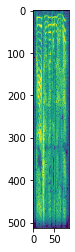

In [10]:
plt.imshow(spec)

In [ ]:
plt.imshow(mel)